In [9]:
import sys
sys.path.append("..")
import mlflow
import pandas as pd

def get_parameters_list(data):
    params  = data['params']
    return [params['model'], params['dataset']]


def get_metrics_list(data):
    if ('metrics' in data.keys()) and data['metrics']:
        metrics = data['metrics']
        return [metrics['accuracy'], metrics['f1_score']]
    else:
        return ['-', '-']

In [10]:
# List all existing experiments
all_experiments = mlflow.list_experiments()
exp_data = []
for exp in all_experiments:
    row = [exp.name, exp.artifact_location, exp.lifecycle_stage]
    exp_data.append(row)
exp_frame = pd.DataFrame(exp_data, columns = ['Name', 'Artifacts', 'Status'])
print(exp_frame)

         Name                                          Artifacts  Status
0  Prediction  file:///mnt/nfs/home/koshkinam/vector-delirium...  active
1     Default  file:///mnt/nfs/home/koshkinam/vector-delirium...  active


In [3]:
# For model training experiment - display last 100 runs with a subset of parameters and metrics
exp = mlflow.get_experiment_by_name('Default')
runs = mlflow.list_run_infos(exp.experiment_id, max_results=100)
data = []
for r in runs:
    run_data = mlflow.get_run(r.run_id).to_dictionary()['data']
    row = get_parameters_list(run_data) + get_metrics_list(run_data)
    data.append(row)
frame = pd.DataFrame(data, columns=['Model', 'Dataset', 'Accuracy', 'F1 Score'])
print('------------------- Model Training Runs ----------------------')
print(frame)

------------------- Model Training Runs ----------------------
  Model Dataset  Accuracy  F1 Score
0   mlp  gemini  0.678671  0.377898
1   mlp  gemini  0.679517  0.357868
2   mlp  gemini  0.673196  0.325274
3   mlp  gemini  0.680284  0.378093
4   mlp    None         -         -


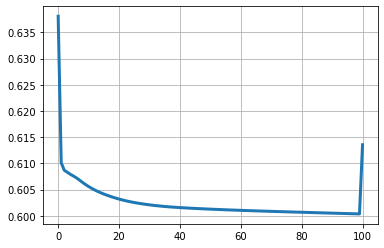

In [8]:
# Show training metrics for the latest model
from mlflow.tracking import MlflowClient
import matplotlib.pyplot as plt
import numpy as np

client = MlflowClient()

# Show training metrics for the latest model
runs = mlflow.list_run_infos(exp.experiment_id, max_results=100)
current = runs[0]
losses = client.get_metric_history(current.run_id, 'epoch_loss')
y = [l.value for l in losses]

fig = plt.figure()
ax = plt.axes()
x = list(range(len(losses)))

plt.plot(x, y, '-', linewidth=3)

#ax.set_xticks(x)

plt.grid()
plt.show()

In [1]:
import config.config as config
import tasks.predict as predict
import sys
sys.path.append("..")

In [3]:
cfg = config.read_config('../config/gemini.cfg')
cfg.model_path = './model_updated_rescale.pt'
cfg.result_output = '../temp_result.csv'

{'config_file': None, 'extract': False, 'train': False, 'predict': False, 'analyze': False, 'user': 'koshkinam', 'password': 'Masha1978', 'port': 5432, 'host': 'db.gemini-hpc.ca', 'database': 'delirium_v3_0_0', 'w': False, 'r': False, 'input': '/mnt/nfs/project/delirium/data/all_before_2018.csv', 'output_folder': '/mnt/nfs/project/delirium/data', 'output_full_path': None, 'stats_path': '/mnt/nfs/project/delirium/data/all_before_2018_stats.pkl', 'features': ['sex', 'age', 'mort_hosp', 'readmission_7', 'readmission_28', 'palliative', 'los_er', 'icd10_A00_B99', 'icd10_C00_D49', 'icd10_D50_D89', 'icd10_E00_E89', 'icd10_F01_F99', 'icd10_G00_G99', 'icd10_H00_H59', 'icd10_H60_H95', 'icd10_I00_I99', 'icd10_J00_J99', 'icd10_K00_K95', 'icd10_L00_L99', 'icd10_M00_M99', 'icd10_N00_N99', 'icd10_O00_O99', 'icd10_Q00_Q99', 'icd10_R00_R99', 'icd10_S00_T88', 'icd10_U07_U08', 'icd10_Z00_Z99', 'icd10_nan'], 'target': 'los', 'pop_size': 10000, 'filter_year': None, 'filter_date_from': '', 'filter_date_to':

In [4]:
predict.main(cfg)

{'means': age       68.942782
los_er    18.431886
dtype: float64, 'std': age       18.734934
los_er    13.019908
dtype: float64}
